In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys

In [7]:
def sample_reward(distr, params):
    if distr == 'uniform':
        return np.random.uniform(params[0], params[1])
    elif distr == 'normal':
        return np.random.normal(params[0], np.sqrt(params[1]))
    else:
        print("The reward function is not defined. Exiting!")
        sys.exit()

#### Q 4 i

Gradient Based Algo
```python
self.H_t=np.zeros(5)
self.pi_t=[0.2,0.2,0.2,0.2,0.2]
self.no_arms=5

def grad_based_learn(self,choice):
    if(choice=='ep_greedy'):
        a_t=self.take_action_epsilon_greedy()
    else:
        a_t= self.take_action_ucb()
    r_t=self.observe_reward(a_t)
    self.update_H_t(a_t,r_t)



def update_H_t(a_t, r_t):
    self.softmax_pi_t()#update pi for th case
    #now update for (t+1) th case ie for next time
    for a in range(self.no_arms):
        if a==a_t:
            H_t[a]=H_t[a]+ self.alpha(r_t-self.avg_reward[-1])(1-self.pi_t(a_t))
        else:
            H_t[a]=H_t[a]+ self.alpha(r_t-self.avg_reward[-1])(0-self.pi_t(a_t))
                                      
def softmax_pi_t():
    sum=np.sum(np.exp(self.H_t))
    for i in range(self.no_arms):
        pi_t[i]=np.exp(self.H_t[i])/sum

```

In [21]:
class q1:
    # for the sake of simplicity the rewards are drawn from Uniforms and normals
    def __init__(self):
        #fixed set of arms 
        self.reward_details = {'N_arms': 5,
                              'distr': ['uniform', 'uniform', 'uniform', 'normal', 'normal'],
                              'params': [(0., 1.), (-1., 2), (1, 2), (0, 1), (1.5, 2)],
                             }
        self.N_t = np.zeros(5)
        self.alpha = 1e-3
        self.eps = 0.01
        self.c = 0.10
        self.avg_reward = [0]
        self.H_t=np.zeros(5)
        self.pi_t=[0.2,0.2,0.2,0.2,0.2]
        self.no_arms=self.reward_details['N_arms']
        
    def get_optimal_reward(self):
        max_reward = -np.inf
        for i in range(self.reward_details['N_arms']):
            if self.reward_details['distr'][i] == 'uniform':
                r = (self.reward_details['params'][i][1] - self.reward_details['params'][i][0])/2.0
            elif self.reward_details['distr'][i] == 'normal':
                r = self.reward_details['params'][i][0]
            else:
                print("The reward function is not defined. Exiting!")
                sys.exit()
            if r > max_reward:
                max_reward = r
        return max_reward
    
    def plot_Bandits_learning(self):
        # plots the action
        plt.bar(np.arange(self.reward_details['N_arms']), self.N_t)
        plt.xlabel('Action')
        plt.ylabel('# selections')
        plt.title('Action selection Distribution')
        # plt.close()

        # plots the average reward at every step
        plt.figure()
        #optimal reward - in this case
        plt.plot(np.log(np.arange(len(self.avg_reward))+1), self.get_optimal_reward()*np.ones(len(self.avg_reward)), color='k', linestyle='--', label='optimal reward')
        plt.plot(np.log(np.arange(len(self.avg_reward))+1), self.avg_reward)
        # plt.plot(np.arange(len(self.avg_reward)), self.get_optimal_reward()*np.ones(len(self.avg_reward)), color='k', linestyle='--', label='optimal reward')
        # plt.plot(np.arange(len(self.avg_reward)), self.avg_reward)
        plt.xlabel('Number of Steps (log scale)')
        plt.ylabel('Average Reward')
        plt.title('Learning Curve for Bandits Agent')
        plt.legend()   
        # plt.close()
    
    ''''def plot_Bandits_learning_compare(self, all_curves, cs):
        # plots the average reward at every step
        plt.figure()
        #optimal reward - in this case
        plt.plot(np.log(np.arange(len(self.avg_reward))+1), self.get_optimal_reward()*np.ones(len(self.avg_reward)), color='k', linestyle='--', label='optimal reward')
        for i in range(len(cs)):
            plt.plot(np.log(np.arange(len(all_curves[i]))+1), all_curves[i], label='c='+str(cs[i]))
        # plt.plot(np.arange(len(self.avg_reward)), self.get_optimal_reward()*np.ones(len(self.avg_reward)), color='k', linestyle='--', label='optimal reward')
        # plt.plot(np.arange(len(self.avg_reward)), self.avg_reward)
        plt.xlabel('Number of Steps (log scale)')
        plt.ylabel('Average Reward')
        plt.title('Learning Curve for Bandits Agent')
        plt.legend()   
        # plt.close()
    '''''

    def take_action_UCB_grad(self):
        #N_t[a] : is the number of times action a was selected
        #so np.sum takes the sum over all the actions  (thus total time)
        ucb_f = self.H_t + self.c * np.sqrt(np.log(1 + np.sum(self.N_t))/(self.N_t + 1e-11))
        a_t = np.argmax(ucb_f)
        self.N_t[a_t] += 1
        return a_t 
    
    def take_action_epsilon_greedy_grad(self):
        if np.random.rand() <= self.eps:
            a_t = np.random.choice(self.reward_details['N_arms'])
        else: 
            a_t = np.argmax(self.pi_t)  # select the best action
        
        self.N_t[a_t] += 1
        return a_t
    
    def observe_reward(self, a_t):
        # return the estimate of r_t
        r_t = sample_reward(self.reward_details['distr'][a_t], self.reward_details['params'][a_t])
        return r_t
          

    def grad_based_learn(self,ep_greedy=True,N_steps=100_000):
            for i in range(N_steps):
                if ep_greedy == True:
                    a_t=self.take_action_epsilon_greedy_grad()
                else:
                    a_t= self.take_action_UCB_grad()
                r_t=self.observe_reward(a_t)
                #Recompute \bar {r}_t since it is required for H_t+1 calculation
                temp_avg_reward = self.avg_reward[-1] + (r_t - self.avg_reward[-1])/(i+1)
                self.avg_reward.append(temp_avg_reward)
                self.update_H_t(a_t,r_t)  
        

    def update_H_t(self,a_t, r_t):
        self.softmax_pi_t() # update pi for time t
        #now update for (t+1) th case ie for next time for H
        for a in range(self.no_arms):
            if a==a_t:
                self.H_t[a]+= self.alpha*(r_t-self.avg_reward[-1])*(1-self.pi_t[a_t])
            else:
                self.H_t[a]+=self.alpha*(r_t-self.avg_reward[-1])*(0-self.pi_t[a_t])
                                      
    def softmax_pi_t(self):
        sum=np.sum(np.exp(self.H_t))
        for i in range(self.no_arms):
            self.pi_t[i]=np.exp(self.H_t[i])/sum

            
    

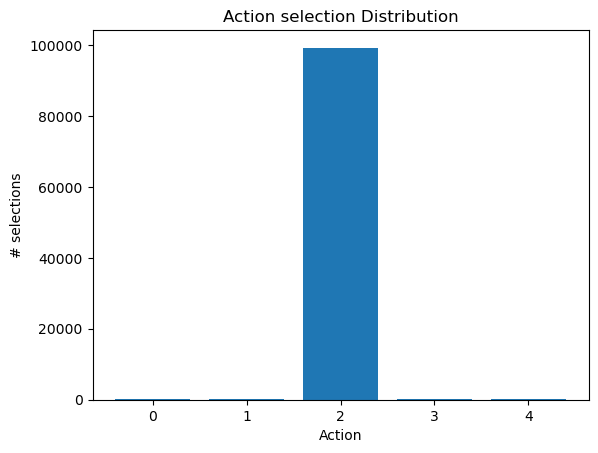

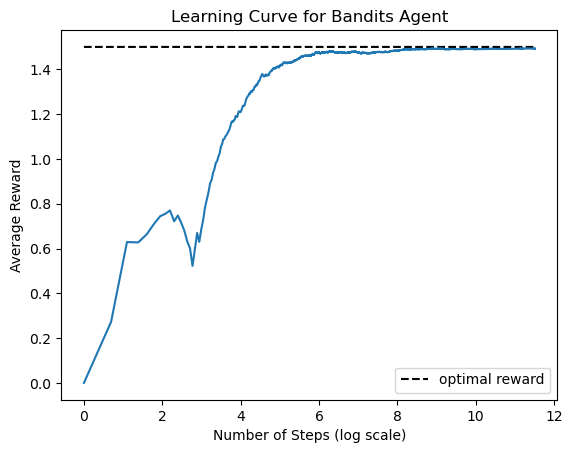

In [23]:

b=q1()
b.grad_based_learn(ep_greedy=True)
b.plot_Bandits_learning()


#### Q 4 ii

Run each of the learning algos and plot
```python
def learn_and_plot(self):
        # plots the average reward at every step
        plt.figure()
        #optimal reward - in this case
        self.montecarlo_learn(ep_greedy=True)
        plt.plot(np.log(np.arange(len(self.avg_reward))+1), self.avg_reward,label='e-greedy')
        self.reinit()
        self.montecarlo_learn(ep_greedy=False)
        ....
```

In [18]:
class q2:
    # for the sake of simplicity the rewards are drawn from Uniforms and normals
    def __init__(self):
        #fixed set of arms 
        self.reward_details = {'N_arms': 5,
                              'distr': ['uniform', 'uniform', 'uniform', 'normal', 'normal'],
                              'params': [(0., 1.), (-1., 2), (1, 2), (0, 1), (1.5, 2)],
                             }
        self.Q_t = np.zeros(5)
        self.N_t = np.zeros(5)
        self.alpha = 1e-3
        self.eps = 0.01
        self.c = 0.10
        self.avg_reward = [0]
        self.H_t=np.zeros(5)
        self.pi_t=[0.2,0.2,0.2,0.2,0.2]
        self.no_arms=self.reward_details['N_arms']
    
    def get_optimal_reward(self):
        max_reward = -np.inf
        for i in range(self.reward_details['N_arms']):
            if self.reward_details['distr'][i] == 'uniform':
                r = (self.reward_details['params'][i][1] - self.reward_details['params'][i][0])/2.0
            elif self.reward_details['distr'][i] == 'normal':
                r = self.reward_details['params'][i][0]
            else:
                print("The reward function is not defined. Exiting!")
                sys.exit()
            if r > max_reward:
                max_reward = r
        return max_reward
    
    def learn_and_plot(self):
        # plots the average reward at every step
        plt.figure()
        #optimal reward - in this case
        self.montecarlo_learn(ep_greedy=True)
        plt.plot(np.log(np.arange(len(self.avg_reward))+1), self.avg_reward,label='e-greedy')
        self.reinit()
        self.montecarlo_learn(ep_greedy=False)
        plt.plot(np.log(np.arange(len(self.avg_reward))+1), self.avg_reward,label='ucb')
        self.reinit()
        self.grad_based_learn(ep_greedy=True)
        plt.plot(np.log(np.arange(len(self.avg_reward))+1), self.avg_reward,label='gradient e-greedy')
        self.reinit()
        #self.grad_based_learn(ep_greedy=False)
        #plt.plot(np.log(np.arange(len(self.avg_reward))+1), self.avg_reward,label='grad ucb')
        plt.plot(np.log(np.arange(len(self.avg_reward))+1), self.get_optimal_reward()*np.ones(len(self.avg_reward)), color='k', linestyle='--', label='optimal reward')
        self.reinit()

        plt.xlabel('Number of Steps (log scale)')
        plt.ylabel('Average Reward')
        plt.title('Learning Curve for Bandits Agent')
        plt.legend()   
        # plt.close()
    

    def reinit(self):
        self.Q_t = np.zeros(5)
        self.N_t = np.zeros(5)
        self.avg_reward = [0]
        self.H_t=np.zeros(5)
        self.pi_t=[0.2,0.2,0.2,0.2,0.2]
        self.no_arms=self.reward_details['N_arms']
        
    #monte carlo - q_t based algo


    def take_action_UCB(self):
        #N_t[a] : is the number of times action a was selected
        #so np.sum takes the sum over all the actions  (thus total time)
        ucb_f = self.Q_t + self.c * np.sqrt(np.log(1 + np.sum(self.N_t))/(self.N_t + 1e-11))
        a_t = np.argmax(ucb_f)
        self.N_t[a_t] += 1
        return a_t 
    
    def take_action_epsilon_greedy(self):
        if np.random.rand() <= self.eps:
            a_t = np.random.choice(self.reward_details['N_arms'])
        else: 
            a_t = np.argmax(self.Q_t)  # select the best action
        
        self.N_t[a_t] += 1
        return a_t
    
    def observe_reward(self, a_t):
        # return the estimate of r_t
        r_t = sample_reward(self.reward_details['distr'][a_t], self.reward_details['params'][a_t])
        return r_t
        
    def update_Q(self, a_t, r_t):
        #get the estimate for Q_t+1
        self.Q_t[a_t] = self.Q_t[a_t] + (r_t - self.Q_t[a_t])/self.N_t[a_t]
    
    def montecarlo_learn(self, ep_greedy=True, N_steps=100_000):
        for i in range(N_steps):
            if ep_greedy == True:
                a_t = self.take_action_epsilon_greedy()
            else:  #ucb action selection
                a_t = self.take_action_UCB()
                
            r_t = self.observe_reward(a_t)
            self.update_Q(a_t, r_t)
            # keep track of the average reward
            temp_avg_reward = self.avg_reward[-1] + (r_t - self.avg_reward[-1])/(i+1)
            self.avg_reward.append(temp_avg_reward)

    #gradient H_t based algo methods 


    def grad_based_learn(self,ep_greedy=True,N_steps=100_000):
            for i in range(N_steps):
                if ep_greedy == True:
                    a_t=self.take_action_epsilon_greedy_grad()
                else:
                    a_t= self.take_action_UCB_grad()
                r_t=self.observe_reward(a_t)
                #Recompute \bar {r}_t since it is required for H_t+1 calculation
                temp_avg_reward = self.avg_reward[-1] + (r_t - self.avg_reward[-1])/(i+1)
                self.avg_reward.append(temp_avg_reward)
                self.update_H_t(a_t,r_t)  
        

    def update_H_t(self,a_t, r_t):
        self.softmax_pi_t() # update pi for time t
        #now update for (t+1) th case ie for next time for H
        for a in range(self.no_arms):
            if a==a_t:
                self.H_t[a]+= self.alpha*(r_t-self.avg_reward[-1])*(1-self.pi_t[a_t])
            else:
                self.H_t[a]+=self.alpha*(r_t-self.avg_reward[-1])*(0-self.pi_t[a_t])
                                      
    def softmax_pi_t(self):
        sum=np.sum(np.exp(self.H_t))
        for i in range(self.no_arms):
            self.pi_t[i]=np.exp(self.H_t[i])/sum

    def take_action_UCB_grad(self):
        #N_t[a] : is the number of times action a was selected
        #so np.sum takes the sum over all the actions  (thus total time)
        ucb_f = self.pi_t + self.c * np.sqrt(np.log(1 + np.sum(self.N_t))/(self.N_t + 1e-11))
        a_t = np.argmax(ucb_f)
        self.N_t[a_t] += 1
        return a_t 
    
    def take_action_epsilon_greedy_grad(self):
        if np.random.rand() <= self.eps:
            a_t = np.random.choice(self.reward_details['N_arms'])
        
        else: 
            a_t = np.argmax(self.pi_t)  # select the best action
        #a_t=np.random.choice(self.reward_details['N_arms'], p=self.pi_t)
        self.N_t[a_t] += 1
        return a_t

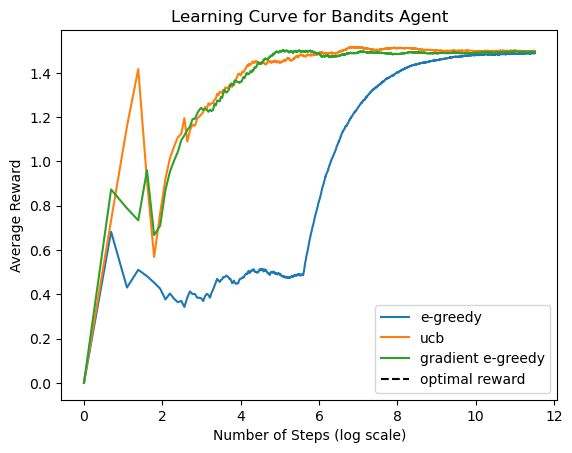

In [17]:
ob2=q2()
ob2.learn_and_plot()


#### Q 4 iii

```python 
self.optimal=[0.]

self.optimal.append(self.N_t[np.argmax(self.N_t)]/np.sum(self.N_t)*100.0)
#or (better)
self.optimal.append(self.N_t[2]/np.sum(self.N_t)*100.0)
```


In [36]:
class q3:
    # for the sake of simplicity the rewards are drawn from Uniforms and normals
    def __init__(self):
        #fixed set of arms 
        self.reward_details = {'N_arms': 5,
                              'distr': ['uniform', 'uniform', 'uniform', 'normal', 'normal'],
                              'params': [(0., 1.), (-1., 2), (1, 2), (0, 1), (1.5, 2)],
                             }
        self.Q_t = np.zeros(5)
        self.N_t = np.zeros(5)
        self.optimal=[0.]
        self.alpha = 1e-3
        self.eps = 0.01
        self.c = 0.10
        self.avg_reward = [0]
        self.H_t=np.zeros(5)
        self.pi_t=[0.2,0.2,0.2,0.2,0.2]
        self.no_arms=self.reward_details['N_arms']

    
    def get_optimal_reward(self):
        max_reward = -np.inf
        for i in range(self.reward_details['N_arms']):
            if self.reward_details['distr'][i] == 'uniform':
                r = (self.reward_details['params'][i][1] - self.reward_details['params'][i][0])/2.0
            elif self.reward_details['distr'][i] == 'normal':
                r = self.reward_details['params'][i][0]
            else:
                print("The reward function is not defined. Exiting!")
                sys.exit()
            if r > max_reward:
                max_reward = r
        return max_reward
    
    def learn_and_plot(self):
        # plots the average reward at every step
        plt.figure()
        #optimal reward - in this case
        self.montecarlo_learn(ep_greedy=True)
        plt.plot(np.log(np.arange(len(self.optimal))+1), self.optimal,label='e-greedy')
        self.reinit()
        self.montecarlo_learn(ep_greedy=False)
        plt.plot(np.log(np.arange(len(self.optimal))+1), self.optimal,label='ucb')
        self.reinit()
        self.grad_based_learn(ep_greedy=True)
        plt.plot(np.log(np.arange(len(self.optimal))+1), self.optimal,label='gradient e-greedy')
        self.reinit()
        #self.grad_based_learn(ep_greedy=False)
        #plt.plot(np.log(np.arange(len(self.optimal))+1), self.optimal,label='grad ucb')
        plt.plot(np.log(np.arange(len(self.avg_reward))+1), self.get_optimal_reward()*np.ones(len(self.avg_reward)), color='k', linestyle='--', label='optimal reward')
        self.reinit()

        plt.xlabel('Number of Steps (log scale)')
        plt.ylabel('% of Optimal Action')
        plt.title('Learning Curve for Bandits Agent')
        plt.legend()   
        # plt.close()
    

    def reinit(self):
        self.Q_t = np.zeros(5)
        self.N_t = np.zeros(5)
        self.optimal=[0.]
        self.avg_reward = [0]
        self.H_t=np.zeros(5)
        self.pi_t=[0.2,0.2,0.2,0.2,0.2]
        self.no_arms=self.reward_details['N_arms']
        
    #monte carlo - q_t based algo


    def take_action_UCB(self):
        #N_t[a] : is the number of times action a was selected
        #so np.sum takes the sum over all the actions  (thus total time)
        ucb_f = self.Q_t + self.c * np.sqrt(np.log(1 + np.sum(self.N_t))/(self.N_t + 1e-11))
        a_t = np.argmax(ucb_f)
        self.N_t[a_t] += 1
        return a_t 
    
    def take_action_epsilon_greedy(self):
        if np.random.rand() <= self.eps:
            a_t = np.random.choice(self.reward_details['N_arms'])
        else: 
            a_t = np.argmax(self.Q_t)  # select the best action
        
        self.N_t[a_t] += 1
        return a_t
    
    def observe_reward(self, a_t):
        # return the estimate of r_t
        r_t = sample_reward(self.reward_details['distr'][a_t], self.reward_details['params'][a_t])
        return r_t
        
    def update_Q(self, a_t, r_t):
        #get the estimate for Q_t+1
        self.Q_t[a_t] = self.Q_t[a_t] + (r_t - self.Q_t[a_t])/self.N_t[a_t]
    
    def montecarlo_learn(self, ep_greedy=True, N_steps=100_000):
        for i in range(N_steps):
            if ep_greedy == True:
                a_t = self.take_action_epsilon_greedy()
            else:  #ucb action selection
                a_t = self.take_action_UCB()

            #self.optimal.append(self.N_t[np.argmax(self.N_t)]/np.sum(self.N_t)*100.0)  
            self.optimal.append(self.N_t[2]/np.sum(self.N_t)*100.0)  
            r_t = self.observe_reward(a_t)
            self.update_Q(a_t, r_t)
            # keep track of the average reward
            temp_avg_reward = self.avg_reward[-1] + (r_t - self.avg_reward[-1])/(i+1)
            self.avg_reward.append(temp_avg_reward)

    #gradient H_t based algo methods 


    def grad_based_learn(self,ep_greedy=True,N_steps=100_000):
            for i in range(N_steps):
                if ep_greedy == True:
                    a_t=self.take_action_epsilon_greedy_grad()
                else:
                    a_t= self.take_action_UCB_grad()

                #self.optimal.append(self.N_t[np.argmax(self.N_t)]/np.sum(self.N_t)*100.0)
                self.optimal.append(self.N_t[2]/np.sum(self.N_t)*100.0)
                r_t=self.observe_reward(a_t)
                #Recompute \bar {r}_t since it is required for H_t+1 calculation
                temp_avg_reward = self.avg_reward[-1] + (r_t - self.avg_reward[-1])/(i+1)
                self.avg_reward.append(temp_avg_reward)
                self.update_H_t(a_t,r_t)  
        

    def update_H_t(self,a_t, r_t):
        self.softmax_pi_t() # update pi for time t
        #now update for (t+1) th case ie for next time for H
        for a in range(self.no_arms):
            if a==a_t:
                self.H_t[a]+= self.alpha*(r_t-self.avg_reward[-1])*(1-self.pi_t[a_t])
            else:
                self.H_t[a]+=self.alpha*(r_t-self.avg_reward[-1])*(0-self.pi_t[a_t])
                                      
    def softmax_pi_t(self):
        sum=np.sum(np.exp(self.H_t))
        for i in range(self.no_arms):
            self.pi_t[i]=np.exp(self.H_t[i])/sum

    def take_action_UCB_grad(self):
        #N_t[a] : is the number of times action a was selected
        #so np.sum takes the sum over all the actions  (thus total time)
        ucb_f = self.pi_t + self.c * np.sqrt(np.log(1 + np.sum(self.N_t))/(self.N_t + 1e-11))
        a_t = np.argmax(ucb_f)
        self.N_t[a_t] += 1
        return a_t 
    
    def take_action_epsilon_greedy_grad(self):
        if np.random.rand() <= self.eps:
            a_t = np.random.choice(self.reward_details['N_arms'])
        
        else: 
            a_t = np.argmax(self.pi_t)  # select the best action
        #a_t=np.random.choice(self.reward_details['N_arms'], p=self.pi_t)
        self.N_t[a_t] += 1
        return a_t

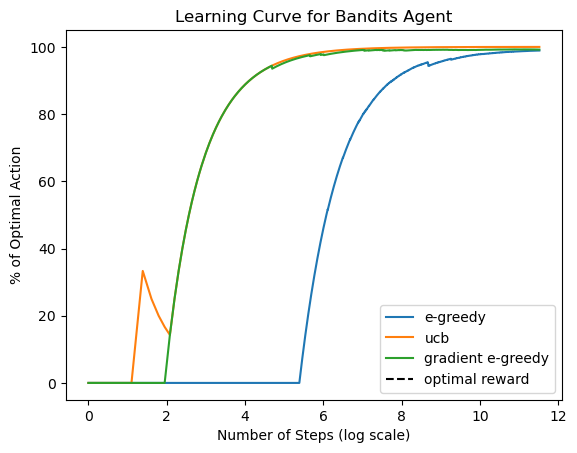

In [37]:

ob3=q3()
ob3.learn_and_plot()


___